In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [49]:
XXX = pd.read_csv("tmp_hms_sav_ass.csv", sep=';')
XXX

,id,idResource,idProject,refType,refId,rate,assignedWork,realWork,leftWork,plannedWork,...,plannedEndDate,idRole,dailyCost,newDailyCost,assignedCost,realCost,leftCost,plannedCost,billedWork,notPlannedWork
0,1,5,1,Activity,1,100,NaN,21.00,0.0,21.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
1,4,15,4,Activity,4,100,NaN,131.00,0.0,131.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
2,6,15,4,Activity,6,100,NaN,21.00,0.0,21.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
3,8,15,4,Activity,9,100,NaN,4.00,0.0,4.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
4,9,15,4,Activity,10,100,NaN,2.00,0.0,2.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,7601,9,34,Activity,594,100,NaN,0.00,0.0,0.00,...,NaN,4.0,873.0,873.0,0.0,0.00,0.0,0.00,0.0,0.0
7197,7602,32,34,Activity,594,100,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7198,7603,9,34,Activity,597,100,NaN,0.25,0.0,0.25,...,NaN,4.0,873.0,873.0,0.0,218.25,0.0,218.25,0.0,0.0
7199,7604,7,12,Activity,1524,100,NaN,0.50,0.0,0.50,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0


In [142]:
XX =  XXX[['idResource','idProject','refId','realCost','realWork']]
dataset = XX.replace(np.nan,0)
dataset = XX.replace(np.nan,0)

dataset['realWork'] =  dataset['realWork'].astype(int)
dataset['realCost'] =  dataset['realCost'].astype(int)

dataset = dataset.drop(dataset[dataset.realWork == 0].index)
dataset = dataset.drop(dataset[dataset.realCost == 0].index)


dataset

,idResource,idProject,refId,realCost,realWork
1496,12,34,489,436,15
1799,9,34,491,9821,11
1800,9,34,494,2837,3
1801,9,34,495,873,1
1803,9,34,498,873,1
1806,9,34,501,873,1
1811,9,34,511,2837,3
1813,9,34,513,1746,2
1814,9,34,514,1746,2
1815,9,34,515,873,1


In [143]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1496 to 7165
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   idResource  17 non-null     int64
 1   idProject   17 non-null     int64
 2   refId       17 non-null     int64
 3   realCost    17 non-null     int32
 4   realWork    17 non-null     int32
dtypes: int32(2), int64(3)
memory usage: 680.0 bytes


In [144]:
dataset.describe()

,idResource,idProject,refId,realCost,realWork
count,17.000000,17.0,17.000000,17.000000,17.000000
mean,9.176471,34.0,510.941176,1810.058824,2.823529
std,0.727607,0.0,17.689936,2173.942975,3.956566
min,9.000000,34.0,489.000000,436.000000,1.000000
25%,9.000000,34.0,495.000000,873.000000,1.000000
50%,9.000000,34.0,513.000000,1091.000000,1.000000
75%,9.000000,34.0,524.000000,1746.000000,2.000000
max,12.000000,34.0,553.000000,9821.000000,15.000000


In [145]:
dataset.columns

Index(['idResource', 'idProject', 'refId', 'realCost', 'realWork'], dtype='object')

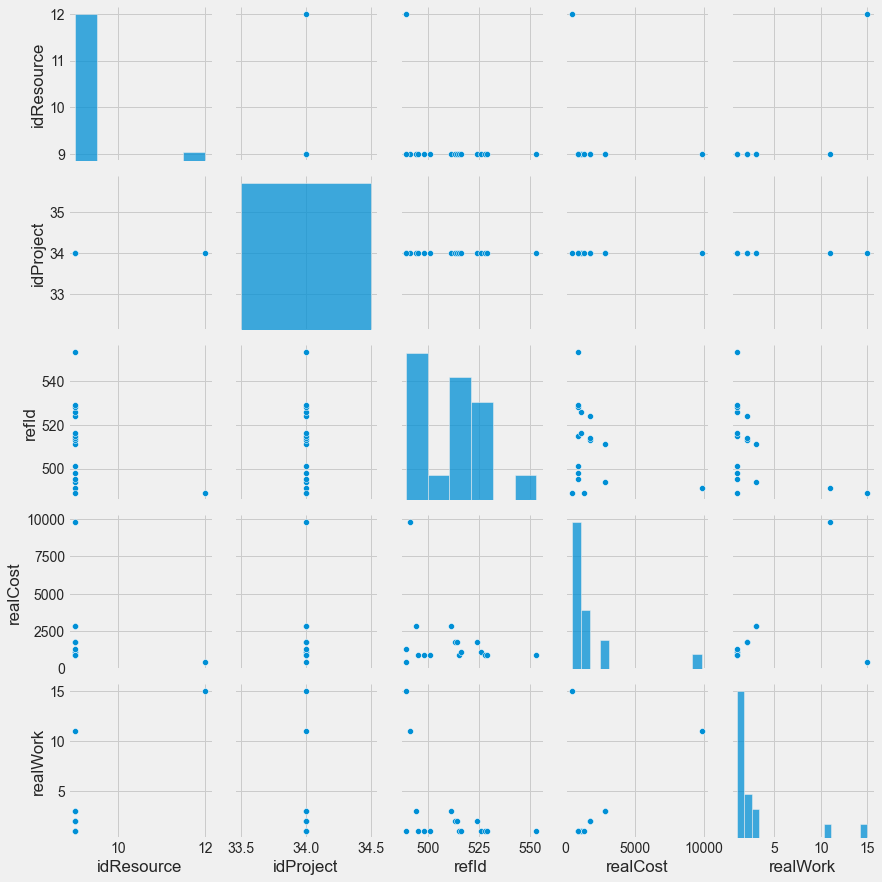

In [146]:
sns.pairplot(dataset)

In [147]:
X = dataset[['idResource','idProject','refId','realWork']]
y = dataset['realCost']

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [149]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [151]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
s = lin_reg.fit(X_train,y_train)

In [152]:
# print the intercept
print(lin_reg.intercept_)

2162.5454545454545


In [153]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
idResource,0.000000
idProject,0.000000
refId,-65.236209
realWork,2504.562162


In [154]:
pred = lin_reg.predict(X_test)

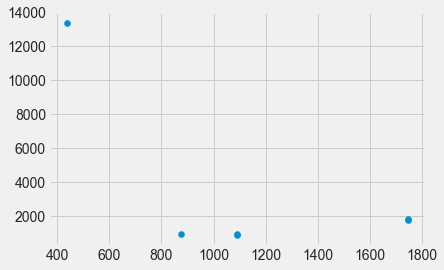

In [155]:
plt.scatter(y_test, pred)

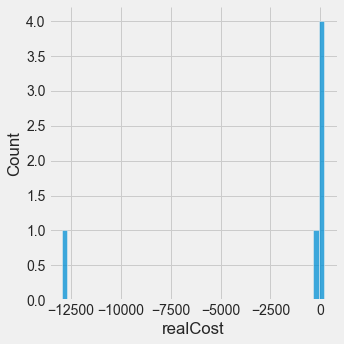

In [156]:
sns.displot((y_test - pred), bins=50);

In [157]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2247.6448195761027
MSE: 27964412.635338616
RMSE: 5288.138863091495
R2 Square -127.79201124170473
__________________________________
Train set evaluation:
_____________________________________
MAE: 95.18998077620785
MSE: 14155.650019838278
RMSE: 118.97751896824155
R2 Square 0.9977894770706793
__________________________________


In [158]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

C:\Users\saifn\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\saifn\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\saifn\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,2247.64482,2.796441e+07,5288.138863,-127.792011,NaN


In [159]:
pre = lin_reg.score(X_test, y_test)
pre

-127.79201124170473